# MidProject: Cats and Dogs, Better
Applied Neural Networks <br/>
Dr. Leslie Kerby

Use the Cats and Dogs dataset in Kaggle from Homework 3. Download the dataset and perform necessary data wrangling or preprocessing, just like you did in HW 3 (ie in Parts 1-3).

#**Part 1** <br/>
Create a CNN dog/cat classifier with the following architecture: <br/>
Conv2D: 64 filters, 7x7 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Flatten <br/>
Dense: 128 neurons <br/>
Dropout(15%) <br/>
Dense: 64 neurons <br/>
Dropout(15%) <br/>
Output <br/>
strides=1, padding="same", and activation="relu" for all relevant layers <br/>
Utilize the Nadam optimizer and Early Stopping

What is your accuracy for the validation set and for the test set? Plot several misclassified images.

Save your accuracy and val_accuracy each epoch. You will plot them in Part 4.

In [1]:
#Setting up Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 807M/814M [00:03<00:00, 222MB/s]
100% 814M/814M [00:03<00:00, 222MB/s]


In [2]:
! mkdir train
! ls

dogs-vs-cats-redux-kernels-edition.zip	kaggle.json  sample_data  train


In [3]:
# unzip the training data all into the newly created training directory
! unzip dogs-vs-cats-redux-kernels-edition.zip -d train

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.zip          
  inflating: train/train.zip         


In [5]:
! unzip train/train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

<Figure size 432x288 with 0 Axes>

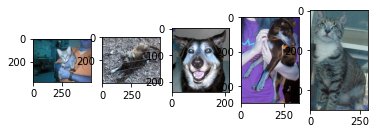

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(15)
tf.random.set_seed(15)

# filenames is a list of all the files we put in the training directory
filenames = os.listdir("train/train/")
# empty list of categories that will be the labels. THIS LIST WILL BE Y
categories = []
# for every file, we split the file name where there is a '.'
# we only keep the first element that was split, which will be
# either 'dog' or 'cat'
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

# Create a dataframe that holds the name (y) of the file and
# the category (x)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# print the first 5 image files from the dataframe and see if they match their title
import cv2
sample_images = []
for i in range(5):
  img = cv2.imread('train/train/' + df['filename'][i], cv2.IMREAD_COLOR)
  sample_images.append(img)
plt.figure()
f, axarr = plt.subplots(1,5)
axarr[0].imshow(sample_images[0])
axarr[1].imshow(sample_images[1])
axarr[2].imshow(sample_images[2])
axarr[3].imshow(sample_images[3])
axarr[4].imshow(sample_images[4])

In [2]:
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (60,60))  # This tuple represents the final image size desired

X = np.ndarray((25000,60,60,3)) # 25000 images, 60x60 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)

from sklearn.model_selection import train_test_split

Y = categories
Y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=5000)

**When restarting colab, run code down to here**

In [8]:
# Print the first element to see its shape
X[0].shape

(60, 60, 3)

In [9]:
df.shape

(25000, 2)

In [14]:
X_train.shape

(15000, 60, 60, 3)

In [15]:
X_val.shape

(5000, 60, 60, 3)

In [3]:
# Setting up the CNN
from keras.models import Sequential

model = Sequential([
      keras.layers.Conv2D(filters=64,
      kernel_size=[7,7],
      strides=[1,1],
      padding="same",
      activation="relu",
      input_shape=[60,60,3]),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Flatten(),

      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(64, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(2, activation="softmax")
])

"\nmodel.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))\nmodel.add(keras.layers.MaxPooling2D((2,2)))\n\nmodel.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))\nmodel.add(keras.layers.MaxPooling2D((2,2)))\n\nmodel.add(keras.layers.Flatten())\n\nmodel.add(keras.layers.Dense(128, input_shape = X_train.shape[1:], activation = 'relu'))\n\nmodel.add(keras.layers.Dense(2, activation = 'softmax'))\n"

In [4]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 41s 59ms/step - loss: 1.0513 - accuracy: 0.5493 - val_loss: 0.6432 - val_accuracy: 0.5984
Epoch 2/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6453 - accuracy: 0.6416 - val_loss: 0.5986 - val_accuracy: 0.6778
Epoch 3/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6167 - accuracy: 0.6645 - val_loss: 0.5821 - val_accuracy: 0.7026
Epoch 4/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6248 - accuracy: 0.6611 - val_loss: 0.5708 - val_accuracy: 0.6996
Epoch 5/50
469/469 [==============================] - 27s 58ms/step - loss: 0.5695 - accuracy: 0.7104 - val_loss: 0.6057 - val_accuracy: 0.6906
Epoch 6/50
469/469 [==============================] - 26s 56ms/step - loss: 0.5692 - accuracy: 0.7106 - val_loss: 0.5914 - val_accuracy: 0.6744
Epoch 7/50
469/469 [==============================] - 26s 55ms/step - loss: 0.5365 - accuracy: 0.7341 - val_loss: 0.5263 - val_accuracy:

In [6]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 19ms/step - loss: 0.4803 - accuracy: 0.7982


[0.4803355038166046, 0.7982000112533569]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


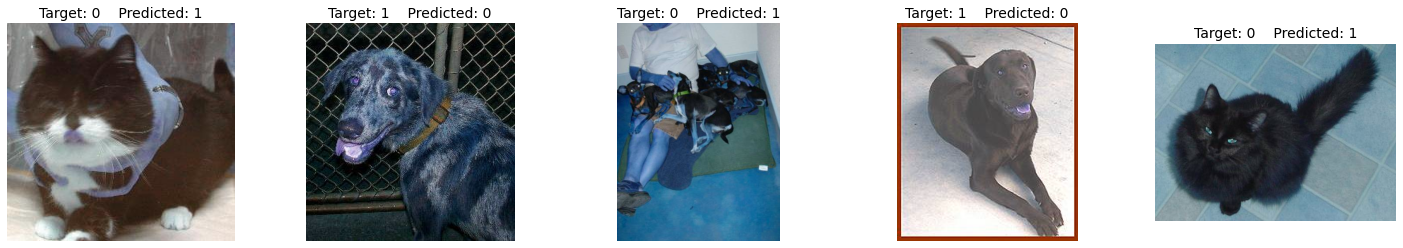

In [7]:
# misclassified images
predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 20000
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
img = cv2.imread('train/train/' + df['filename'][misclassifiedIndexes[0]], cv2.IMREAD_COLOR)
plt.imshow(img)

temp = 1
for index in misclassifiedIndexes:
  plt.subplot(1,5,temp)
  img = cv2.imread('train/train/' + df['filename'][index], cv2.IMREAD_COLOR)
  plt.axis('off')
  plt.title(f'Target: {categories[y_test[index - 20000]]}    Predicted: {categories[predictions[index - 20000]]}', fontsize=14)
  plt.imshow(img)
  temp += 1
  if temp > 5:
    break

**Model Eval** </br>
Validation Accuracy -> 79.72% </br>
Test Accuracy -> 79.82% </br>
The model performed decently and got through 18 epochs before early stopping interrupted it. It got an accuracy of about 80%, which can be improved on. The misclassified images don't seem to be very confusing, so the model is probably just not the best at identifying cats vs dogs. </br>
accuracy and val_accuracy saved in ```history```


#**Part 2** </br>
Add data augmentation. Try different CNN architectures and/or parameters to improve your model. You may also try splitting up the dataset differently (ie more images in training and less in validation and testing sets).

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.

**Part 3**</br>
Use transfer learning. Train on at least three different expert CNNs: Xception, a variant of ResNet, and a variant of EfficientNet. See [here](https://keras.io/api/applications/) for a full list of models available in Keras. Please note that many of these have special requirements (for image size etc). You decide (or experiment with) how to best transfer learn on these expert CNNs.

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.



**Part 4**</br>
Plot the training and validation accuracy per epoch for your (best) model from each part. Discuss any differences. Which model(s) tend to be overfit? Which model(s) are not? Why?

Note: If you have a model B that is only a little better than a model A with respect to validation/testing accuracy, but model B is not overfit and model A is, that is actually a huge improvement. 

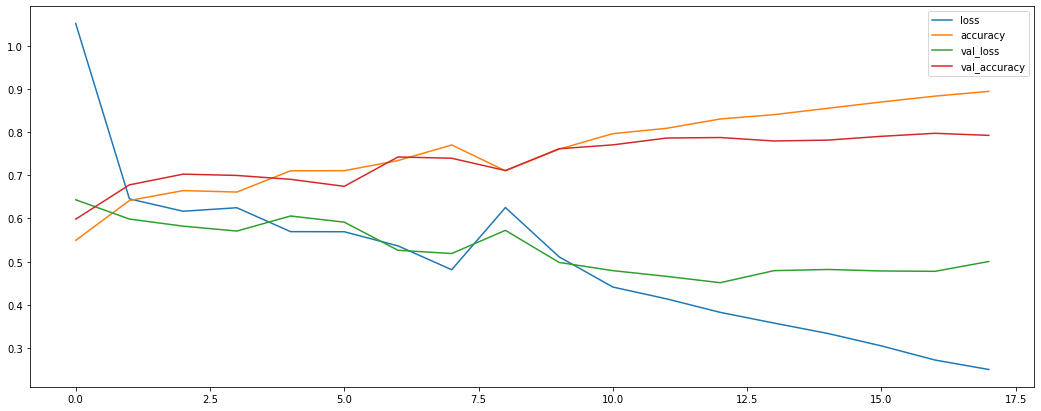

In [9]:
# Part 1 Model
# Evaluation -> loss: 0.4803 - accuracy: 0.7982
pd.DataFrame(history.history).plot(figsize=(18,7))

In [ ]:
# Part 2 Best Model
# Evaluation -> 